### Assignment 18 - Forecasting 

#### 1st Problem Statement

Forecast the Airlines Passengers, Explain how many dummy variables you have created and RMSE value for each model.
Finally which model you will use for Forecasting.

Dataset --> Airlines+Data.xlsx

In [1]:
#Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import sqrt
import itertools
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
# Loading the Dataset
Dataset = pd.read_excel("C:/Users/Akaash/Downloads/Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)
Dataset.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [3]:
#Checking NA Values
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


Inference: No NA Values Present

### Forecasting - Visualization

#### Line Plot

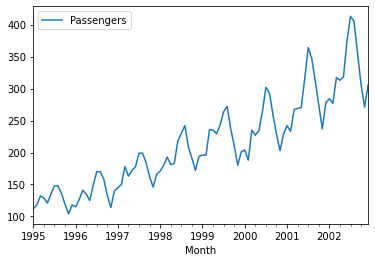

In [4]:
# Line Plot
Dataset.plot()
pyplot.show()

Inference: A Simple Line Plot Showing the Month/Year wise Passengers Aboard

#### Histogram and Density Plots

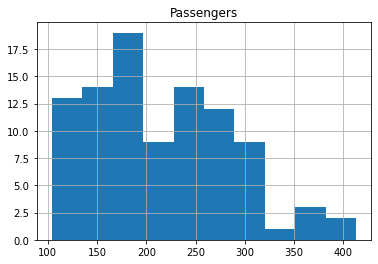

In [5]:
# Histogram
Dataset.hist()
pyplot.show()

Inference: Data is Fairly Distributed, Close to Normal Distribution

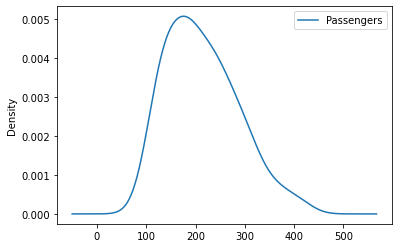

In [6]:
#Density Plot
Dataset.plot(kind='kde')
pyplot.show()

Inference: Close to Normal Distribution, Values are Concentrated around 200 (i.e: 200 Passengers)

#### Lag plot

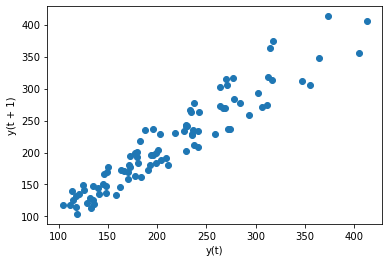

In [7]:
# create a scatter plot / Lag Plot
from pandas.plotting import lag_plot
#Plotting
lag_plot(Dataset)
pyplot.show()

Inference: There is a Linear Relationship betwwen the Y(t) & Y(t + 1) Variable

#### ACF Plot

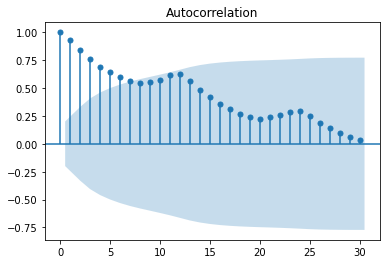

In [8]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
#Plotting
plot_acf(Dataset,lags=30)
pyplot.show()

Inference: Only First Few lags have Statistically Significant Correlation

### Forecasting -  Model Based Methods

In [9]:
# Loading the Dataset
Dataset = pd.read_excel("C:/Users/Akaash/Downloads/Airlines+Data.xlsx", header=0, parse_dates=True)
Dataset.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [10]:
# Month Extraction Dummies Variables
Dataset["Date"] = pd.to_datetime(Dataset.Month,format="%b-%y")
Dataset["Month"] = Dataset.Date.dt.strftime("%b")
#Creating t, t_sq & log_Y Variables
month_dummies = pd.DataFrame(pd.get_dummies(Dataset['Month']))
Dataset1 = pd.concat([Dataset['Passengers'],month_dummies],axis = 1)
Dataset1["t"] = np.arange(1,97)
Dataset1["t_sq"] = np.sqrt(Dataset1["t"])
Dataset1["log_Passengers"] = np.log(Dataset1["Passengers"])
Dataset1.head()

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1.000000,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,1.414214,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,1.732051,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,2.000000,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,2.236068,4.795791


Inference: Now we have variable t, t_sq & log_Passengers(log_Y) for Model Based Methods

#### Splitting data

In [11]:
# Splitting
Train = Dataset1.head(76)
Test = Dataset1.tail(20)

Inference: Data is splitted, 20 Months are Kept For Validation

In [12]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

57.00014788256588

Inference: Linear Model RMSE = 57.0

In [13]:
#Exponential Model

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.62154394719406

Inference: Exponential Model RMSE = 46.62

In [14]:
#Quadratic Model
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

55.579643409637406

Inference: Quadratic Model RMSE = 55.57

In [15]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.25413439949492

Inference: Additive seasonality Model RMSE = 132.25

In [16]:
#Additive Seasonality Quadratic Model

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                                                         'Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

36.51002300681375

Inference: Additive seasonality with Quadratic Model RMSE = 36.51

In [17]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.61090856256547

Inference: Multiplicative seasonality Model RMSE = 137.61

In [18]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.784250178760612

Inference: Additive Multiplicative seasonality Model RMSE = 11.78

### Forecasting -  Data Driven Methods

In [19]:
# Data Driven Model Library
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [20]:
# Loading the Dataset
Dataset = pd.read_excel("C:/Users/Akaash/Downloads/Airlines+Data.xlsx", header=0, parse_dates=True)
Dataset.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


#### Splitting data

In [21]:
# Splitting
Train = Dataset.head(76)
Test = Dataset.tail(20)

#### Simple Exponential Method (SES)

In [22]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
ses_model_rmse = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array((pred_ses)))**2))
ses_model_rmse

82.11594314672372

Inference: Simple Exponential Method (SES) RMSE = 82.11

#### Holt method (DES)

In [23]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
hw_model_rmse = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array((pred_hw)))**2))
hw_model_rmse

47.98872996523835

Inference: Holt's Method (DES) RMSE = 47.98

#### Holts winter exponential smoothing with additive seasonality and additive trend (TES)

In [24]:
#add the trend to the model
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
hwe_model_add_add_rmse = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array((pred_hwe_add_add)))**2))
hwe_model_add_add_rmse

37.73007966060939

Inference: Holt's Winter Method (TES) RMSE = 37.73

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [25]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
hwe_model_mul_add_rmse = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array((pred_hwe_mul_add)))**2))
hwe_model_mul_add_rmse

33.87795811066329

Inference: Holt's Winter Method (TES) RMSE = 33.87

### Forecasting - Arima Models

In [26]:
# Loading the Dataset
Dataset = pd.read_excel("C:/Users/Akaash/Downloads/Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)
Dataset.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


#### ACF plots and PACF plots

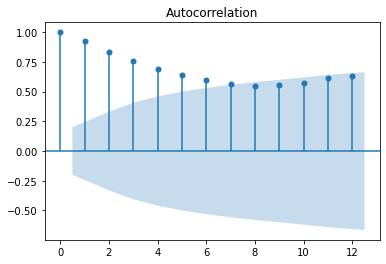

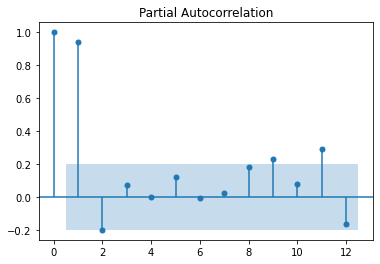

In [27]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Dataset.Passengers,lags=12)
tsa_plots.plot_pacf(Dataset.Passengers,lags=12)
plt.show()

#### Splitting data

In [28]:
# separate out a validation dataset
split_point = len(Dataset) - 20
dataset, validation = Dataset[0:split_point], Dataset[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('C:/Users/Akaash/Downloads/dataset_1st.csv', header=False)
validation.to_csv('C:/Users/Akaash/Downloads/validation_1st.csv', header=False)

Dataset 76, Validation 20


#### Persistence/ Base model

In [29]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('C:/Users/Akaash/Downloads/dataset_1st.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=180.000, Expected=193.000
>Predicted=193.000, Expected=181.000
>Predicted=181.000, Expected=183.000
>Predicted=183.000, Expected=218.000
>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>

Inference: Persistence Model RMSE = 22.69

#### ARIMA Hyperparameters 

In [30]:
# grid search ARIMA parameters for a time series
from statsmodels.tsa.arima_model import ARIMA

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [31]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [32]:
# load dataset
train = read_csv('C:/Users/Akaash/Downloads/Dataset_1st.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
#Grid Search Evaluate
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=64.949
ARIMA(0, 0, 1) RMSE=38.229
ARIMA(0, 1, 0) RMSE=22.773
ARIMA(0, 1, 1) RMSE=22.695
ARIMA(0, 1, 2) RMSE=24.214
ARIMA(0, 2, 0) RMSE=29.721
ARIMA(0, 2, 1) RMSE=23.450
ARIMA(0, 2, 2) RMSE=23.277
ARIMA(1, 0, 0) RMSE=23.350
ARIMA(1, 0, 1) RMSE=23.083
ARIMA(1, 0, 2) RMSE=468.564
ARIMA(1, 1, 0) RMSE=22.780
ARIMA(1, 2, 0) RMSE=28.143
ARIMA(2, 0, 0) RMSE=23.261
ARIMA(2, 1, 0) RMSE=22.839
ARIMA(2, 2, 0) RMSE=27.069
Best ARIMA(0, 1, 1) RMSE=22.695


#### Building Arima Model based on the optimized values From Grid Search CV

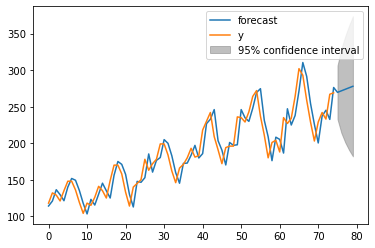

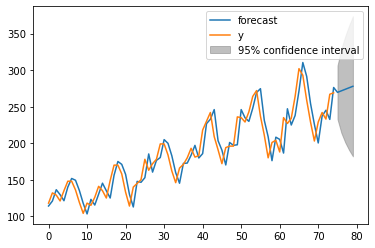

In [33]:
# Building  Arima Model with order=(0,1,1)
model = ARIMA(X, order=(0,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=20)[0]
model_fit.plot_predict(1,80)

In [34]:
#Error on the test data
val=pd.read_csv('C:/Users/Akaash/Downloads/validation_1st.csv',header=None)
arima_rmse = sqrt(mean_squared_error(val[1], forecast))
arima_rmse

52.02929575296171

Inference: Arima Model RMSE = 52.02

### Document of All Model RMSE

In [35]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_arima","rmse_add_sea","rmse_add_sea_quad",
                           "rmse_Mult_sea","rmse_Mult_add_sea","ses_model_rmse","hw_model_rmse","hwe_model_add_add_rmse",
                           "hwe_model_mul_add_rmse"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,arima_rmse,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,
                                 rmse_Mult_add_sea,ses_model_rmse,hw_model_rmse,hwe_model_add_add_rmse,hwe_model_mul_add_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
7,rmse_Mult_add_sea,11.784250
11,hwe_model_mul_add_rmse,33.877958
5,rmse_add_sea_quad,36.510023
10,hwe_model_add_add_rmse,37.730080
1,rmse_Exp,46.621544
9,hw_model_rmse,47.988730
3,rmse_arima,52.029296
2,rmse_Quad,55.579643
0,rmse_linear,57.000148
8,ses_model_rmse,82.115943


##### Inference: From this Document Table We Can See "rmse_Mult_add_sea" i.e. (Multiplicative Additive Seasonality Model) has the Lowest RMSE So will Build Final Model of Multiplicative Additive Seasonality Model

### Final Model - Multiplicative Additive Seasonality Model - (RMSE = 11.78)

In [36]:
#Building The Final Model On The Entire Dataset 

Final_Model = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Dataset1).fit()
Final_pred = pd.Series(Final_Model.predict(Dataset1))
rmse_Final = np.sqrt(np.mean((np.array(Dataset1['Passengers'])-np.array(np.exp(Final_pred)))**2))
rmse_Final 

8.933548467712644

Inference: Final Model RMSE on Entire Dataset is 8.93